# Multi-scale retinex with color enhancement

## Setting up.

In [1]:
import os
from src import config
from src.utils import read_show, plot_hist
from src.retinex import MSRCR
import cv2
import matplotlib.pyplot as plt
from src import gamma
from src import merge

%matplotlib inline
PATH = "input"

We imported the functions and set the PATH to our input images. Lets work on one of them.

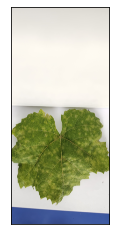

In [2]:
# 图片名称不要出现中文
img_list = os.listdir(PATH)

# 选取一个图片展示， 可以取0,1,2等
idx = 1

# print(img_list[idx])
image = read_show(PATH,img_list[idx],show=True)

Clearly the image wasn't accquired properly (the non-illumination affects visible). This needs some enhacement to improve the interpretability, before any further image processing could be done on it..

## View through the RETINAx (Enhancing through MSCR)

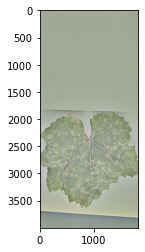

In [3]:
# 实行MRSCR算法
msrcr_img = MSRCR(image,config.SIGMA_LIST,config.ALPHA,config.BETA,config.G,config.OFFSET)
plt.imshow(msrcr_img)

In [4]:
# 保存MRSCR图片
fname = img_list[idx]
save_file = os.path.join('output\mrscr_img', fname)
cv2.imwrite(save_file, msrcr_img, [cv2.IMWRITE_JPEG_QUALITY, 100])

True

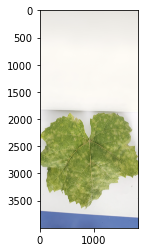

In [5]:
# 运行Gamma算法
gamma_img = gamma.gamma_correction(image)
plt.imshow(gamma_img)

In [6]:
# 保存gamma图片
save_file = os.path.join('output\gamma_img', fname)
cv2.imwrite(save_file, gamma_img, [cv2.IMWRITE_JPEG_QUALITY, 100])

True

We've applied the algorithm on the image, let's see how different it is now from our original image..

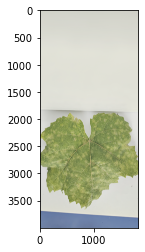

In [7]:
# 将两张图片合并
merge_img = merge.merge_run(gamma_img, msrcr_img)
plt.imshow(merge_img)

In [8]:
# 保存合并图片
save_file = os.path.join('output\merge_img', fname)
cv2.imwrite(save_file, merge_img, [cv2.IMWRITE_JPEG_QUALITY, 100])

True

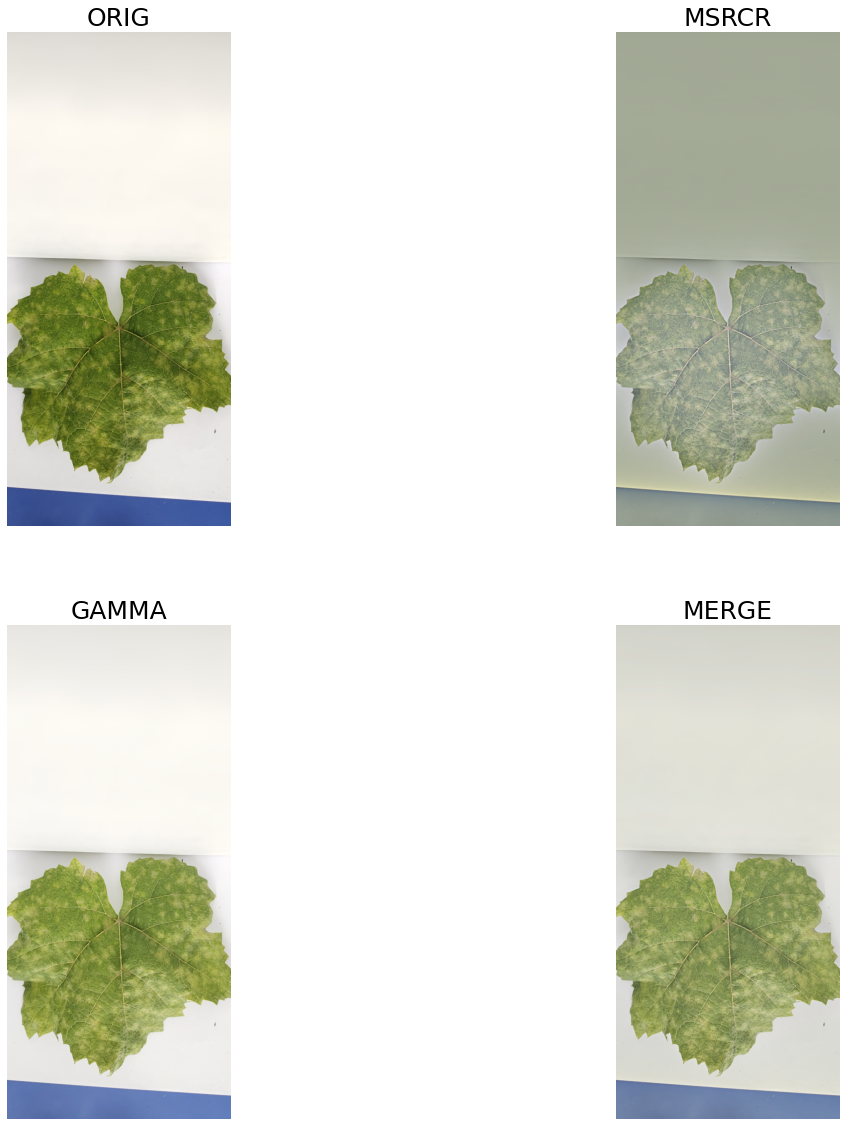

In [12]:
# img = cv2.imread("/home/forrest/图片/lena彩图.png")
fig, axes = plt.subplots(2,2,figsize=(20,20))

axes[0][0].set_title("ORIG",fontsize=25)
axes[0][0].imshow(image)
axes[0][0].axis('off')

axes[0][1].set_title("MSRCR",fontsize=25)
axes[0][1].imshow(msrcr_img)
axes[0][1].axis('off')

axes[1][0].set_title("GAMMA",fontsize=25)
axes[1][0].imshow(gamma_img)
axes[1][0].axis('off')

merge_img = cv2.imread(os.path.join('output\merge_img', fname))

axes[1][1].set_title("MERGE",fontsize=25)
axes[1][1].imshow(merge_img)
axes[1][1].axis('off')
file_name = os.path.join("output", "compare.jpg")
plt.savefig(file_name)
plt.show()

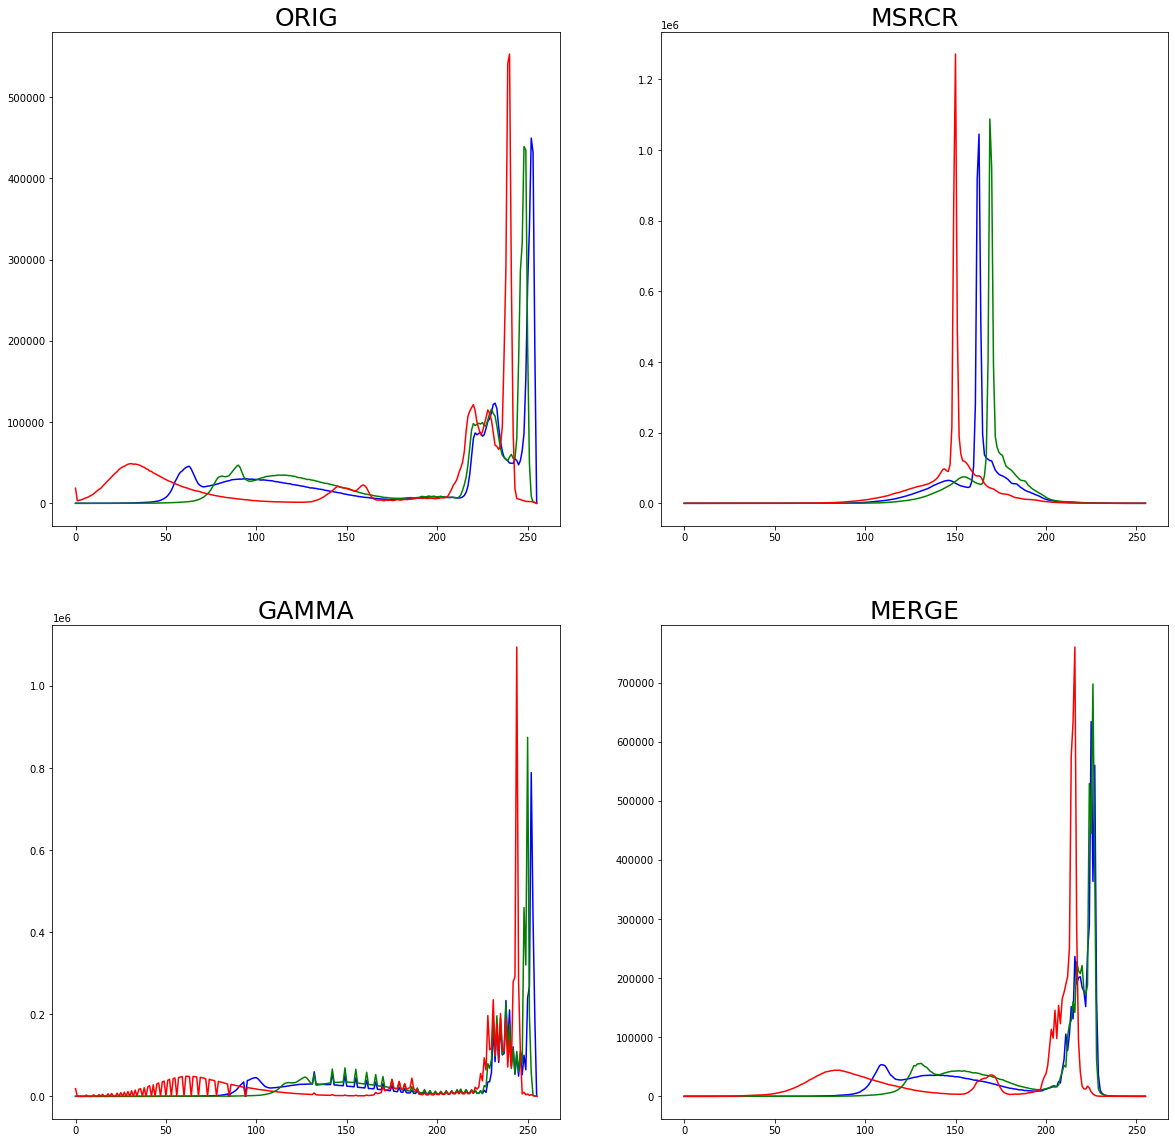

In [10]:
# img = cv2.imread("/home/forrest/图片/lena彩图.png")
fig, axes = plt.subplots(2,2,figsize=(20,20))

histb = cv2.calcHist([image], [0], None, [256], [0, 255])
histg = cv2.calcHist([image], [1], None, [256], [0, 255])
histr = cv2.calcHist([image], [2], None, [256], [0, 255])

axes[0][0].set_title("ORIG", fontsize=25)
axes[0][0].plot(histb, color="b")
axes[0][0].plot(histg, color="g")
axes[0][0].plot(histr, color="r")

histb = cv2.calcHist([msrcr_img], [0], None, [256], [0, 255])
histg = cv2.calcHist([msrcr_img], [1], None, [256], [0, 255])
histr = cv2.calcHist([msrcr_img], [2], None, [256], [0, 255])

axes[0][1].set_title("MSRCR", fontsize=25)
axes[0][1].plot(histb, color="b")
axes[0][1].plot(histg, color="g")
axes[0][1].plot(histr, color="r")

histb = cv2.calcHist([gamma_img], [0], None, [256], [0, 255])
histg = cv2.calcHist([gamma_img], [1], None, [256], [0, 255])
histr = cv2.calcHist([gamma_img], [2], None, [256], [0, 255])

axes[1][0].set_title("GAMMA", fontsize=25)
axes[1][0].plot(histb, color="b")
axes[1][0].plot(histg, color="g")
axes[1][0].plot(histr, color="r")

merge_img = cv2.imread(os.path.join('output\merge_img', fname))

histb = cv2.calcHist([merge_img], [0], None, [256], [0, 255])
histg = cv2.calcHist([merge_img], [1], None, [256], [0, 255])
histr = cv2.calcHist([merge_img], [2], None, [256], [0, 255])

axes[1][1].set_title("MERGE", fontsize=25)
axes[1][1].plot(histb, color="b")
axes[1][1].plot(histg, color="g")
axes[1][1].plot(histr, color="r")

file_name = os.path.join("output", "rgb.jpg")
plt.savefig(file_name)
plt.show()


"TADA !!!" , we have our enhanced image. It's so much better now to work on.